<a href="https://colab.research.google.com/github/jesicagimenez94/Python_Data_Science/blob/master/Algoritmo_de_clasificacion_de_imagenes_de_flores_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_dir='/root/tensorflow_datasets/tf_flowers/3.0.1',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)
['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']
Tamaño de la imagen: (256, 256, 3)


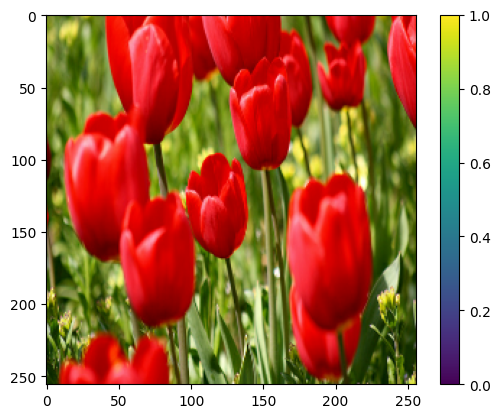

Datos de entrenamiento: 2936
Datos de prueba: 734
Epoch 1/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 390s 4s/step - accuracy: 0.2219 - loss: 1.6077
Epoch 2/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 287us/step - accuracy: 0.1667 - loss: 1.6303
Epoch 3/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


91/91 ━━━━━━━━━━━━━━━━━━━━ 431s 4s/step - accuracy: 0.2349 - loss: 1.6011
Epoch 4/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 147us/step - accuracy: 0.2500 - loss: 1.6040
Epoch 5/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 390s 4s/step - accuracy: 0.2464 - loss: 1.6000


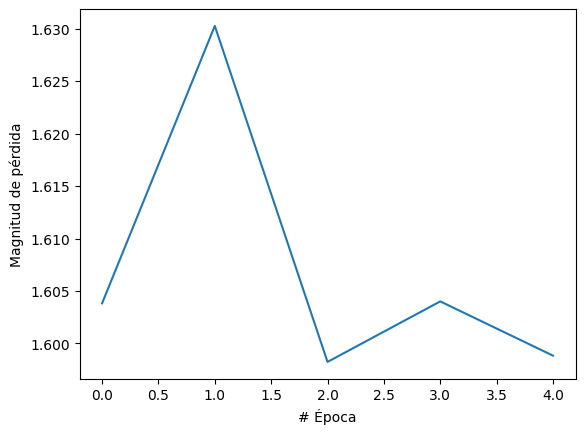

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


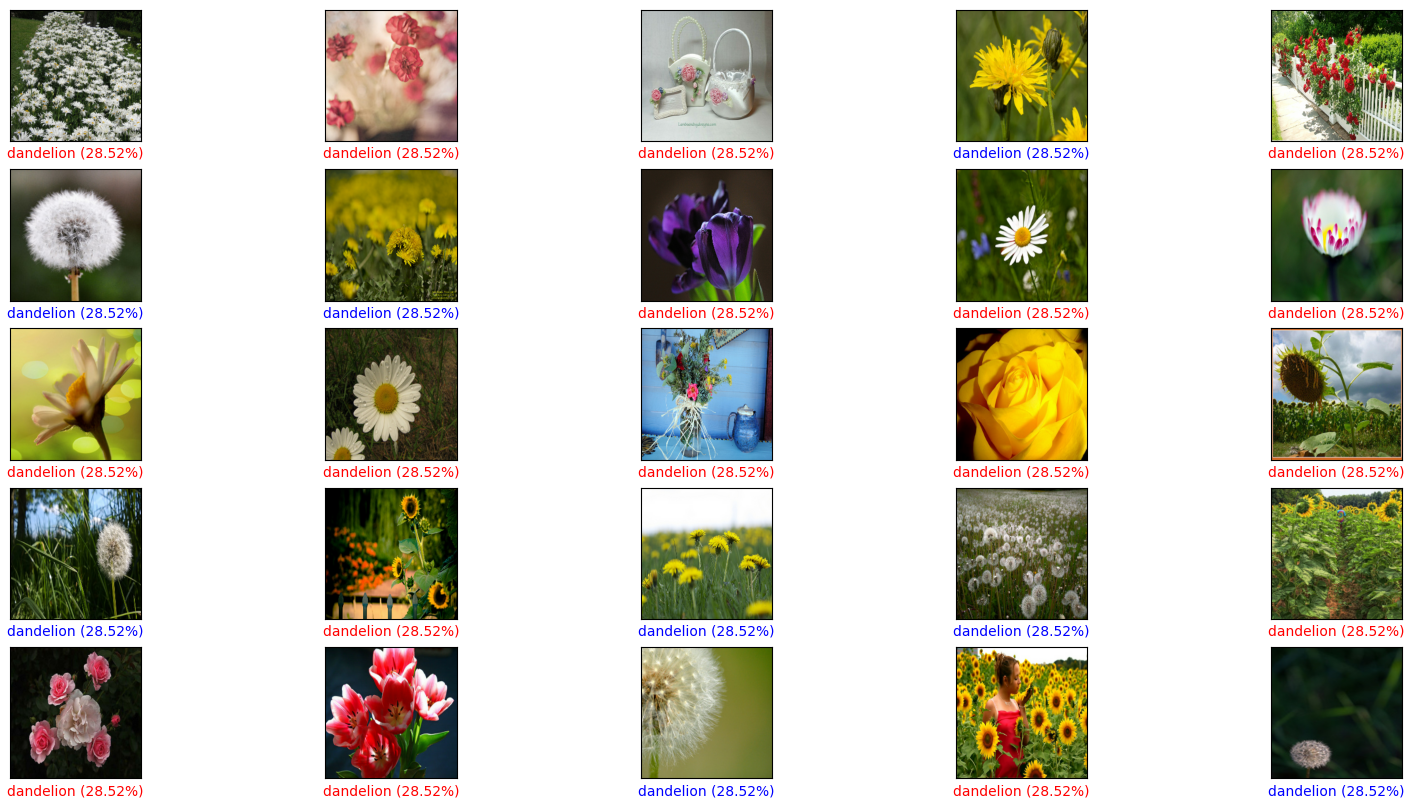

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 664.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 79.6 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully un

2025-01-16 00:20:39.177733: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736986839.241524    7241 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736986839.252303    7241 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

# Descargar el conjunto de datos 'tf_flowers' (flores)
datos, metadatos = tfds.load('tf_flowers', as_supervised=True, with_info=True)

# Imprimir los metadatos para ver qué contiene el dataset
print(metadatos)

# El dataset tiene una sola división, así que lo dividimos manualmente
# Podemos usar la función `take` para extraer una fracción de los datos
tamaño_entrenamiento = int(0.8 * metadatos.splits['train'].num_examples)  # 80% para entrenamiento
tamaño_prueba = metadatos.splits['train'].num_examples - tamaño_entrenamiento  # 20% para prueba

# Dividir el dataset en entrenamiento y prueba
datos_entrenamiento = datos['train'].take(tamaño_entrenamiento)
datos_pruebas = datos['train'].skip(tamaño_entrenamiento)

# Etiquetas de las 5 categorías posibles
nombres_clases = metadatos.features['label'].names
print(nombres_clases)

# Función de normalización para los datos (Pasar de 0-255 a 0-1)
# Hace que la red aprenda mejor y más rápido
def normalizar(imagenes, etiquetas):
    imagenes = tf.cast(imagenes, tf.float32)
    imagenes /= 255  # Normalizar de 0-255 a 0-1
    return imagenes, etiquetas

# Función de redimensionado de imágenes
def redimensionar(imagenes, etiquetas):
    imagenes = tf.image.resize(imagenes, (256, 256))  # Aseguramos que todas las imágenes tengan el tamaño correcto
    return imagenes, etiquetas

# Aplicar normalización y redimensionamiento
datos_entrenamiento = datos_entrenamiento.map(redimensionar).map(normalizar)
datos_pruebas = datos_pruebas.map(redimensionar).map(normalizar)

# Agregar a cache (usar memoria en lugar de disco, entrenamiento más rápido)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

# Mostrar una imagen de los datos de prueba, de momento mostremos la primera
for imagen, etiqueta in datos_entrenamiento.take(1):
    break

# Verificar el tamaño de la imagen
print(f"Tamaño de la imagen: {imagen.shape}")

# Dibujar la imagen
imagen = imagen.numpy()  # Convertir tensor a numpy array
plt.figure()
plt.imshow(imagen)
plt.colorbar()
plt.grid(False)
plt.show()

# Crear el modelo
modelo = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(256, 256, 3)),  # Aseguramos que la entrada esté normalizada
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # 5 clases para las flores
])

# Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Número de datos en entrenamiento y pruebas (80% y 20%)
num_ej_entrenamiento = tamaño_entrenamiento
num_ej_pruebas = tamaño_prueba

print(f"Datos de entrenamiento: {num_ej_entrenamiento}")
print(f"Datos de prueba: {num_ej_pruebas}")

# El trabajo por lotes permite que entrenamientos con gran cantidad de datos se haga de manera más eficiente
TAMANO_LOTE = 32

# Shuffle y repeat hacen que los datos estén mezclados de manera aleatoria para que la red
# no se aprenda el orden de las cosas
datos_entrenamiento = datos_entrenamiento.shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

# Entrenar
historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch=num_ej_entrenamiento // TAMANO_LOTE)

# Ver la función de pérdida
plt.xlabel("# Época")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])
plt.show()

# Pintar una cuadrícula con varias predicciones, y marcar si fue correcta (azul) o incorrecta (roja)
for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
    imagenes_prueba = imagenes_prueba.numpy()
    etiquetas_prueba = etiquetas_prueba.numpy()
    predicciones = modelo.predict(imagenes_prueba)

def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
    arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    etiqueta_prediccion = np.argmax(arr_predicciones)
    if etiqueta_prediccion == etiqueta_real:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{nombres_clases[etiqueta_prediccion]} ({100*np.max(arr_predicciones):.2f}%)", color=color)

# Graficar un conjunto de imágenes de prueba
filas = 5
columnas = 5
num_imagenes = filas * columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
    plt.subplot(filas, 2*columnas, 2*i+1)
    graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
plt.show()

# Exportar el modelo
modelo.save('modelo_flowers_exportado.h5')

# Convertir el archivo h5 a formato de TensorFlow.js
!pip install tensorflowjs
!mkdir tfjs_target_dir
!tensorflowjs_converter --input_format keras modelo_flowers_exportado.h5 tfjs_target_dir
